Importing libraries

In [1]:
from tensorflow.keras import Sequential, datasets
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
import numpy as np
from matplotlib import pyplot as plt
import os

Load dataset

In [2]:
(X_train, y_train), (X_test, y_test) = datasets.cifar10.load_data()
print(X_train.shape)
print(X_test.shape)

(50000, 32, 32, 3)
(10000, 32, 32, 3)


Reshape Y-sample

In [3]:
y_train = y_train.reshape(-1)
y_train

array([6, 9, 9, ..., 9, 1, 1], dtype=uint8)

In [4]:
y_classes = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]

Display the image

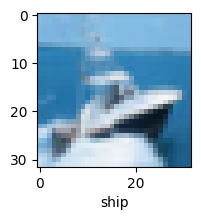

In [5]:
def showImage(X, y, index):
    plt.figure(figsize=(15, 2))
    plt.imshow(X[index])
    plt.xlabel(y_classes[y[index]])

showImage(X_train, y_train, 8)

Normalise the dataset

In [6]:
#visulaise before normalization
print(X_train[0])

X_train = X_train / 255.0
X_test = X_test / 255.0

#visulaise after normalization
print(X_train[0])

[[[ 59  62  63]
  [ 43  46  45]
  [ 50  48  43]
  ...
  [158 132 108]
  [152 125 102]
  [148 124 103]]

 [[ 16  20  20]
  [  0   0   0]
  [ 18   8   0]
  ...
  [123  88  55]
  [119  83  50]
  [122  87  57]]

 [[ 25  24  21]
  [ 16   7   0]
  [ 49  27   8]
  ...
  [118  84  50]
  [120  84  50]
  [109  73  42]]

 ...

 [[208 170  96]
  [201 153  34]
  [198 161  26]
  ...
  [160 133  70]
  [ 56  31   7]
  [ 53  34  20]]

 [[180 139  96]
  [173 123  42]
  [186 144  30]
  ...
  [184 148  94]
  [ 97  62  34]
  [ 83  53  34]]

 [[177 144 116]
  [168 129  94]
  [179 142  87]
  ...
  [216 184 140]
  [151 118  84]
  [123  92  72]]]
[[[0.23137255 0.24313725 0.24705882]
  [0.16862745 0.18039216 0.17647059]
  [0.19607843 0.18823529 0.16862745]
  ...
  [0.61960784 0.51764706 0.42352941]
  [0.59607843 0.49019608 0.4       ]
  [0.58039216 0.48627451 0.40392157]]

 [[0.0627451  0.07843137 0.07843137]
  [0.         0.         0.        ]
  [0.07058824 0.03137255 0.        ]
  ...
  [0.48235294 0.3450980

Building the model

In [7]:
model = Sequential()

model.add(Conv2D(filters = 32, kernel_size =(3,3), activation = "relu", input_shape = (32, 32, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters = 64, kernel_size = (4, 4), activation = "relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(units = 34, activation = "relu"))
model.add(Dense(units = 10, activation = "softmax"))

Compilation of model

In [8]:
model.compile(
    optimizer = "adam",
    loss = "sparse_categorical_crossentropy",
    metrics = ["accuracy"]
)

Train the model

In [9]:
model.fit(X_train, y_train, validation_data= (X_test, y_test), epochs=5)

Epoch 1/5
1563/1563 [==============================] - 118s 55ms/step - loss: 1.4582 - accuracy: 0.4741 - val_loss: 1.2625 - val_accuracy: 0.5463
Epoch 2/5
1563/1563 [==============================] - 79s 51ms/step - loss: 1.1024 - accuracy: 0.6145 - val_loss: 1.0141 - val_accuracy: 0.6469
Epoch 3/5
1563/1563 [==============================] - 78s 50ms/step - loss: 0.9826 - accuracy: 0.6599 - val_loss: 0.9572 - val_accuracy: 0.6694
Epoch 4/5
1563/1563 [==============================] - 80s 51ms/step - loss: 0.9017 - accuracy: 0.6890 - val_loss: 0.9712 - val_accuracy: 0.6644
Epoch 5/5
1563/1563 [==============================] - 81s 52ms/step - loss: 0.8411 - accuracy: 0.7087 - val_loss: 0.9617 - val_accuracy: 0.6634


Make predictions

In [10]:
y_predictions = model.predict(X_test)

print(y_predictions[9])

y_predictions = [np.argmax(arr) for arr in y_predictions]

print(y_classes[y_predictions[9]])

313/313 [==============================] - 6s 17ms/step
[1.7560126e-03 9.5558143e-01 2.3181629e-04 3.1363039e-04 1.6067846e-04
 2.3885105e-04 4.0612238e-05 7.9280857e-05 1.7849864e-02 2.3747884e-02]
automobile


Evaluation

In [11]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_predictions))

              precision    recall  f1-score   support

           0       0.63      0.77      0.70      1000
           1       0.83      0.74      0.78      1000
           2       0.49      0.68      0.57      1000
           3       0.50      0.48      0.49      1000
           4       0.75      0.44      0.56      1000
           5       0.71      0.39      0.50      1000
           6       0.71      0.79      0.75      1000
           7       0.67      0.77      0.72      1000
           8       0.68      0.87      0.76      1000
           9       0.82      0.70      0.76      1000

    accuracy                           0.66     10000
   macro avg       0.68      0.66      0.66     10000
weighted avg       0.68      0.66      0.66     10000



Confussion metrics

[[769   9  61  22   4   0   7  17  93  18]
 [ 57 743   7   9   3   2   7   2  87  83]
 [ 71   8 682  48  29  26  52  54  24   6]
 [ 41  11 126 476  44  79  97  58  57  11]
 [ 60   6 194  57 442  13  83 114  29   2]
 [ 34   5 145 230  20 392  45 101  24   4]
 [ 10   3  75  60  18   9 787   6  26   6]
 [ 39   2  74  32  27  22  14 772   8  10]
 [ 68  13  15   9   0   4   5   5 866  15]
 [ 63  95  14  14   3   8  10  22  66 705]]


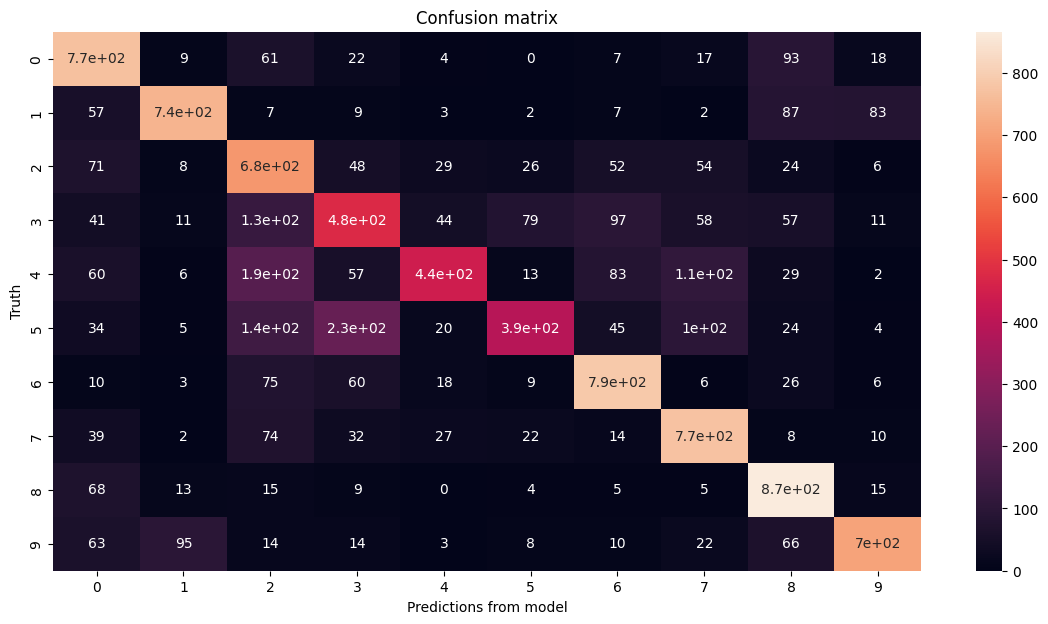

In [12]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_predictions)

print(cm)

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 7))
sns.heatmap(cm, annot=True)
plt.ylabel("Truth")
plt.xlabel("Predictions from model")
plt.title("Confusion matrix")
plt.show()